In [1]:
import numpy as np
import pandas as pd
import os, sys, gc, warnings, random, datetime
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import japanize_matplotlib

from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, GroupKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from catboost import CatBoostRegressor

warnings.filterwarnings('ignore')

In [3]:
train=pd.read_feather('../data/train_feat2.ftr')
test=pd.read_feather('../data/test_feat2.ftr')
Y_train=train.rent
X_train=train.drop(['id','rent'],axis=1)

test.index=test['index']
X_test=test.drop(['id','rent','index'],axis=1)

In [4]:
categorical_features=list(X_train.columns[X_train.dtypes=='category'])

In [5]:
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [6]:
cat_params={'iterations':500,
'learning_rate':0.01,
'depth':10,
'loss_function':'RMSE',
'eval_metric':'RMSE',
'random_seed' : 55,
'od_type':'Iter',
'metric_period' : 50,
'od_wait':20,
'use_best_model':True}

In [7]:
splits = 5
folds = KFold(n_splits=splits)

aucs = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns

training_start_time = time()

y_preds = np.zeros(X_test.shape[0])

for fold_n, (trn_idx, val_idx) in enumerate(folds.split(X_train,Y_train)):
    cv_fold_start_time = time()
    print ('** Training fold {}'.format(fold_n + 1))
    X_trn, X_val = X_train.iloc[trn_idx], X_train.iloc[val_idx]
    y_trn, y_val = Y_train[trn_idx], Y_train[val_idx]
    eval_set  = [(X_trn,y_trn), (X_val, y_val)]
    
    reg = CatBoostRegressor(**cat_params)        
    reg.fit(
        X_trn,y_trn,
        eval_set=(X_val, y_val),
        cat_features=categorical_features,
        use_best_model=True,
        verbose=True)
    
    del X_trn, y_trn
    
    val=reg.predict(X_val)
    feature_importances['fold_{}'.format(fold_n + 1)] = reg.feature_importances_
    
    y_preds+=reg.predict(X_test)/splits
    del reg, X_val
    print('RMSE accuracy: {}'.format(rmse(y_val, val)))
    del val,y_val

    gc.collect()
    
    cv_fold_end_time = time()
    print ('fold completed in {}s'.format(cv_fold_end_time - cv_fold_start_time))

** Training fold 1


0:	learn: 72015.4621358	test: 77991.6911518	best: 77991.6911518 (0)	total: 612ms	remaining: 5m 5s
50:	learn: 54434.4714075	test: 61721.6816866	best: 61721.6816866 (50)	total: 24.8s	remaining: 3m 38s
100:	learn: 46667.5710741	test: 54538.2573765	best: 54538.2573765 (100)	total: 47.2s	remaining: 3m 6s
150:	learn: 42149.6003990	test: 50409.7450453	best: 50409.7450453 (150)	total: 1m 9s	remaining: 2m 39s
200:	learn: 38324.6477303	test: 47057.3010186	best: 47057.3010186 (200)	total: 1m 31s	remaining: 2m 16s
250:	learn: 35023.1978856	test: 44288.6751937	best: 44288.6751937 (250)	total: 1m 51s	remaining: 1m 50s
300:	learn: 32372.3458565	test: 42145.7515629	best: 42145.7515629 (300)	total: 2m 13s	remaining: 1m 28s
350:	learn: 29965.3694814	test: 40326.7073162	best: 40326.7073162 (350)	total: 2m 30s	remaining: 1m 3s
400:	learn: 27574.5991397	test: 38633.8965551	best: 38633.8965551 (400)	total: 2m 53s	remaining: 42.8s
450:	learn: 25463.2553475	test: 37254.0192019	best: 37254.0192019 (450)	total:

0:	learn: 73618.3176305	test: 71668.1834664	best: 71668.1834664 (0)	total: 437ms	remaining: 3m 38s
50:	learn: 55768.5562230	test: 53468.8027275	best: 53468.8027275 (50)	total: 25.3s	remaining: 3m 42s
100:	learn: 48328.5605192	test: 45521.3861884	best: 45521.3861884 (100)	total: 48.7s	remaining: 3m 12s
150:	learn: 43492.3891874	test: 40402.4399146	best: 40402.4399146 (150)	total: 1m 10s	remaining: 2m 43s
200:	learn: 39574.3188978	test: 36502.0333882	best: 36502.0333882 (200)	total: 1m 32s	remaining: 2m 17s
250:	learn: 36743.5911504	test: 33786.7239451	best: 33786.7239451 (250)	total: 1m 53s	remaining: 1m 52s
300:	learn: 34295.0857324	test: 31594.6580788	best: 31594.6580788 (300)	total: 2m 13s	remaining: 1m 28s
350:	learn: 31999.3600305	test: 29859.6825898	best: 29859.6825898 (350)	total: 2m 34s	remaining: 1m 5s
400:	learn: 29610.6224779	test: 28356.5824902	best: 28356.5824902 (400)	total: 2m 56s	remaining: 43.5s
450:	learn: 27568.1133780	test: 27311.7608219	best: 27311.7608219 (450)	tot

0:	learn: 73778.4764333	test: 70935.7735462	best: 70935.7735462 (0)	total: 532ms	remaining: 4m 25s
50:	learn: 56624.5468479	test: 53252.2682157	best: 53252.2682157 (50)	total: 26.4s	remaining: 3m 52s
100:	learn: 49202.3976466	test: 45166.1857150	best: 45166.1857150 (100)	total: 47.7s	remaining: 3m 8s
150:	learn: 44334.9568714	test: 39812.2766276	best: 39812.2766276 (150)	total: 1m 11s	remaining: 2m 45s
200:	learn: 40631.1118793	test: 35816.0508306	best: 35816.0508306 (200)	total: 1m 54s	remaining: 2m 50s
250:	learn: 37598.1330396	test: 32653.6439125	best: 32653.6439125 (250)	total: 2m 31s	remaining: 2m 30s
300:	learn: 35093.9435876	test: 30141.6743087	best: 30141.6743087 (300)	total: 3m 4s	remaining: 2m 2s
350:	learn: 32707.8177342	test: 28082.8640599	best: 28082.8640599 (350)	total: 3m 43s	remaining: 1m 34s
400:	learn: 30311.9991393	test: 26258.6982243	best: 26258.6982243 (400)	total: 4m 20s	remaining: 1m 4s
450:	learn: 28136.8177877	test: 24894.8321474	best: 24894.8321474 (450)	total

0:	learn: 73294.6848137	test: 72945.4139870	best: 72945.4139870 (0)	total: 755ms	remaining: 6m 16s
50:	learn: 55823.4993872	test: 54824.8948870	best: 54824.8948870 (50)	total: 41.5s	remaining: 6m 5s
100:	learn: 48318.9909344	test: 46670.5852880	best: 46670.5852880 (100)	total: 1m 18s	remaining: 5m 8s
150:	learn: 43903.1926357	test: 41892.2790811	best: 41892.2790811 (150)	total: 2m 48s	remaining: 6m 28s
200:	learn: 40304.7243508	test: 38076.9706153	best: 38076.9706153 (200)	total: 3m 22s	remaining: 5m
250:	learn: 37330.0645873	test: 34951.3724842	best: 34951.3724842 (250)	total: 3m 53s	remaining: 3m 52s
300:	learn: 34934.2428490	test: 32552.7739382	best: 32552.7739382 (300)	total: 4m 23s	remaining: 2m 54s
350:	learn: 32616.6798097	test: 30325.4757257	best: 30325.4757257 (350)	total: 4m 55s	remaining: 2m 5s
400:	learn: 30259.0184424	test: 28351.7656683	best: 28351.7656683 (400)	total: 5m 33s	remaining: 1m 22s
450:	learn: 28098.0683020	test: 26715.9087841	best: 26715.9087841 (450)	total: 

0:	learn: 73436.5755696	test: 72428.2328018	best: 72428.2328018 (0)	total: 4.4s	remaining: 36m 35s
50:	learn: 56006.1391841	test: 54195.7031969	best: 54195.7031969 (50)	total: 1m 6s	remaining: 9m 45s
100:	learn: 48975.6304333	test: 46423.5679741	best: 46423.5679741 (100)	total: 1m 30s	remaining: 5m 57s
150:	learn: 44179.1551247	test: 41545.2318510	best: 41545.2318510 (150)	total: 1m 54s	remaining: 4m 25s
200:	learn: 40487.6584575	test: 37928.0097016	best: 37928.0097016 (200)	total: 2m 18s	remaining: 3m 25s
250:	learn: 37171.5653064	test: 34870.7014260	best: 34870.7014260 (250)	total: 2m 35s	remaining: 2m 34s
300:	learn: 34780.9166819	test: 32714.8177459	best: 32714.8177459 (300)	total: 2m 52s	remaining: 1m 54s
350:	learn: 32287.1233886	test: 30779.0635128	best: 30779.0635128 (350)	total: 3m 14s	remaining: 1m 22s
400:	learn: 29873.0480797	test: 29086.5109234	best: 29086.5109234 (400)	total: 3m 37s	remaining: 53.8s
450:	learn: 27716.8972385	test: 27895.0037285	best: 27895.0037285 (450)	t

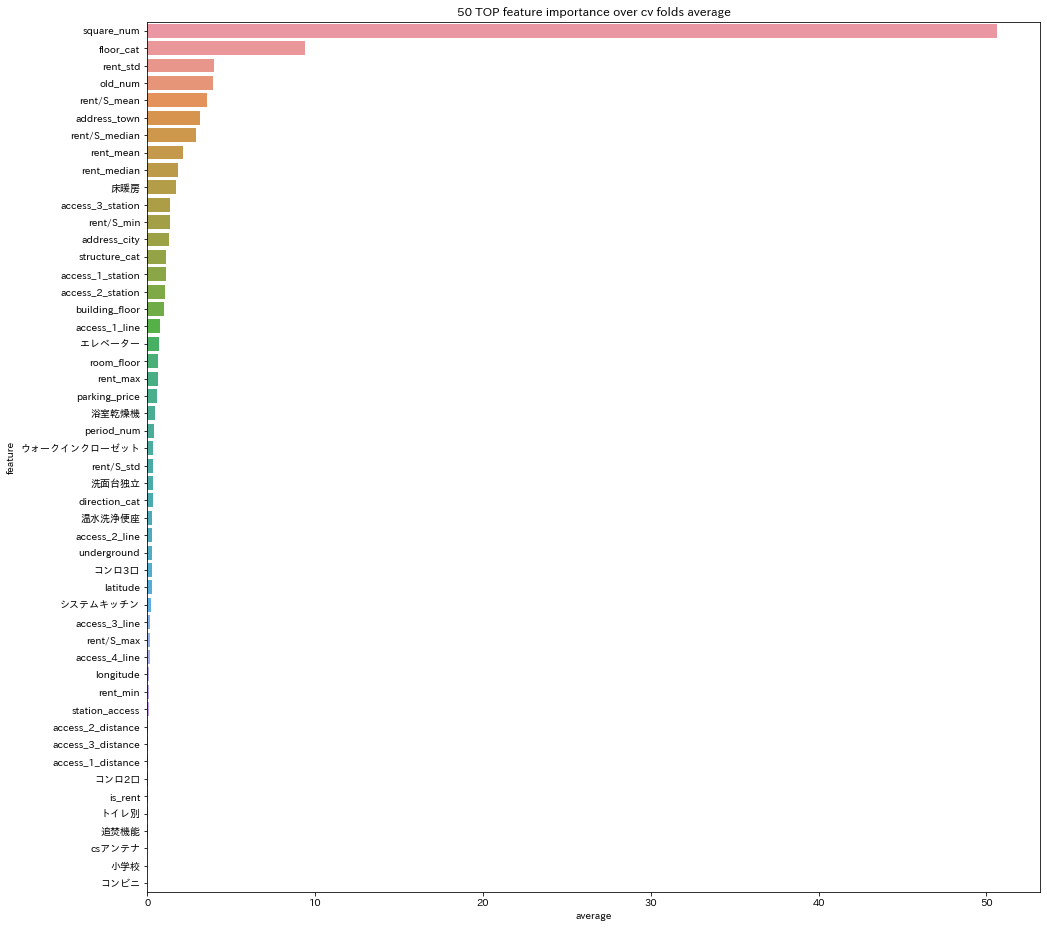

In [8]:
feature_importances['average'] = feature_importances.mean(axis=1)
feature_importances.to_feather('feat1_catboost_importance.ftr')
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature')
plt.title('50 TOP feature importance over cv folds average')
plt.savefig('feat1_catboost_importance.png')